In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import shutil

In [2]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils import np_utils

print()

In [3]:
temp_dir = "../temp/"

def init_dir(dir):
    try:
        if os.path.exists(dir):
            shutil.rmtree(dir)
            os.makedirs(dir)
            print("Clear the directory: {}".format(dir))
        else:
            os.makedirs(dir)
            print("Create the directory: {}".format(dir))
    except OSError:
        init_dir(dir)
init_dir(temp_dir)

def savefig(fig, file_name):
    fig.savefig(temp_dir + file_name + ".png")
    print("Image file saved:", temp_dir + file_name + ".png")

Create the directory: ../temp/


In [4]:
print("Loading data...")
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()
print("Done")
print("x_train_image.shape = {}".format(x_train_image.shape))
print("y_train_label.shape = {}".format(y_train_label.shape))
print(" x_test_image.shape = {}".format(x_test_image.shape))
print(" y_test_label.shape = {}\n".format(y_test_label.shape))

Loading data...
Done
x_train_image.shape = (60000, 28, 28)
y_train_label.shape = (60000,)
 x_test_image.shape = (10000, 28, 28)
 y_test_label.shape = (10000,)



Image file saved: ../temp/mlp_images_train_0_7.png



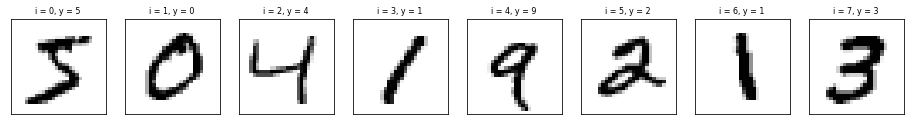

In [5]:
images_per_row = 8
defualt_row_number = 1
max_row_number = 3

def plot_images_labels_prediction(images, labels,
                                  prediction = [],
                                  start_index = 0,
                                  num = images_per_row * defualt_row_number):
    plt.clf()
    fig = plt.gcf()
    fig.set_size_inches(images_per_row * 2, images_per_row * 1.5)
    if num > images_per_row * max_row_number:
        raise ValueError("The maximum data number to print is " + str(images_per_row * max_row_number) + ".")
    for i in range(0, num):
        ax = plt.subplot(max_row_number, images_per_row, 1 + i)
        ax.imshow(images[start_index], cmap="binary")
        title = "i = " + str(start_index) + ", y = " + str(labels[start_index])
        if len(prediction) > 0:
            title += ", predict = " + str(prediction[start_index])
        ax.set_title(title, fontsize = 8)
        ax.set_xticks([])
        ax.set_yticks([])
        start_index += 1
#   plt.show()
    if len(prediction) <= 0:
        savefig(fig, "mlp_images_train_" + str(start_index - num) + "_" + str(start_index - 1))
    else:
        savefig(fig, "mlp_images_test_" + str(start_index - num) + "_" + str(start_index - 1))

plot_images_labels_prediction(x_train_image, y_train_label)
print()

In [6]:
# normalize input image, 0 < input < 1
def normalize_input(input_image):
    return input_image.reshape(input_image.shape[0], 28 * 28).astype("float64") / 255

# normalize output label as one-hot encoding, for example, 4 will normalize as [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
def normalize_output(output_label):
    return np_utils.to_categorical(output_label)

# data preprocessing
x_train = normalize_input(x_train_image)
x_test  = normalize_input(x_test_image)
y_train = normalize_output(y_train_label)
y_test  = normalize_output(y_test_label)

In [7]:
# create multi-layer preceptron neural network
model = Sequential()
# hidden layer 1
model.add(
    Dense(
        units = 100,
        input_dim = 784,
        activation = "relu",
        kernel_initializer = "normal",
        bias_initializer = "normal"
    )
)
# dropout layer
model.add(
    Dropout(
        rate = 0.5
    )
)
# hidden layer 2
model.add(
    Dense(
        units = 10,
        activation = "softmax",
        kernel_initializer = "normal",
        bias_initializer = "normal"
    )
)
print(model.summary(), "\n")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None 



In [8]:
# definite training method
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [9]:
# start training, by TensorFlow for CPU
train_history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 200,
    epochs = 20,
    validation_split = 0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 28us/step - loss: 0.7627 - acc: 0.7803 - val_loss: 0.3056 - val_acc: 0.9167
Epoch 2/20
48000/48000 [==============================] - 1s 24us/step - loss: 0.3734 - acc: 0.8925 - val_loss: 0.2326 - val_acc: 0.9362
Epoch 3/20
48000/48000 [==============================] - 1s 24us/step - loss: 0.3044 - acc: 0.9134 - val_loss: 0.1931 - val_acc: 0.9466
Epoch 4/20
48000/48000 [==============================] - 1s 24us/step - loss: 0.2633 - acc: 0.9228 - val_loss: 0.1696 - val_acc: 0.9531
Epoch 5/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.2376 - acc: 0.9311 - val_loss: 0.1526 - val_acc: 0.9578
Epoch 6/20
48000/48000 [==============================] - 1s 24us/step - loss: 0.2213 - acc: 0.9353 - val_loss: 0.1435 - val_acc: 0.9598
Epoch 7/20
48000/48000 [==============================] - 1s 24us/step - loss: 0.2033 - acc: 0.9410 - val_loss: 0.1326 - val_acc

In [10]:
def show_train_history(train_history, train, validation):
    plt.clf()
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc = "upper left")
#   plt.show()
    savefig(plt, "mlp_training_history_" + train)

Image file saved: ../temp/mlp_training_history_acc.png


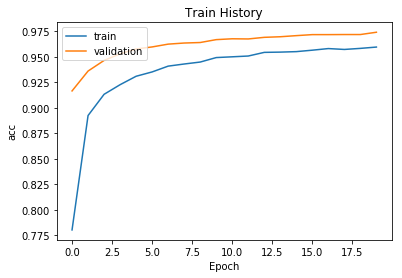

In [11]:
show_train_history(train_history, "acc", "val_acc")

Image file saved: ../temp/mlp_training_history_loss.png



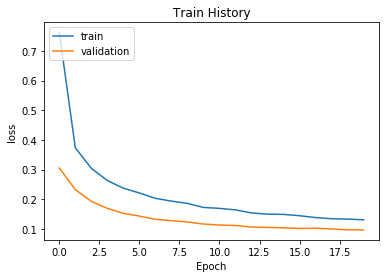

In [12]:
show_train_history(train_history, "loss", "val_loss")
print()

In [13]:
print("Evaluating: ")
scores = model.evaluate(x_test, y_test)
print("The loss of testing data:", scores[0])
print("The accuracy of testing data = {}%".format(scores[1] * 100.0))

Evaluating: 
10000/10000 [==============================] - 0s 24us/step
The loss of testing data: 0.09374306360008194
The accuracy of testing data = 97.17%


In [14]:
print("Predicting: ")
prediction = model.predict_classes(x_test, verbose = 1)
print(pd.crosstab(y_test_label, prediction, colnames=["predict"], rownames=["y"]), "\n")

Predicting: 
10000/10000 [==============================] - 0s 20us/step
predict    0     1    2    3    4    5    6    7    8    9
y                                                         
0        965     0    2    1    0    3    5    2    2    0
1          0  1123    2    1    0    0    2    0    7    0
2          4     1  996    9    2    1    4    7    8    0
3          0     0    2  991    0    3    0    7    3    4
4          0     0    4    0  955    0    5    1    2   15
5          2     0    1    9    2  864    5    2    4    3
6          6     3    0    1    4    6  935    0    3    0
7          1     9   14    6    1    0    0  990    0    7
8          3     2    4    8    4    5    2    6  938    2
9          2     7    1   11   13    5    0    7    3  960 



In [15]:
print("Data frame for error cases:")
df = pd.DataFrame({"label": y_test_label, "predict": prediction})
error_list = df.loc[df.label != df.predict]
print(error_list, "\n")

Data frame for error cases:
      label  predict
38        2        3
241       9        8
247       4        6
259       6        0
320       9        7
321       2        7
340       5        3
381       3        7
445       6        0
448       9        8
495       8        2
551       7        1
582       8        2
659       2        8
684       7        3
691       8        4
707       4        9
717       0        6
720       5        8
740       4        9
810       7        2
839       8        3
844       8        7
881       4        9
947       8        9
951       5        4
965       6        0
1014      6        5
1039      7        2
1112      4        6
...     ...      ...
9015      7        2
9016      0        5
9019      7        2
9024      7        2
9045      7        2
9280      8        5
9482      5        3
9530      9        8
9587      9        4
9634      0        3
9642      9        7
9664      2        7
9679      6        3
9692      9        7
9700  

The error case is at i = 35
Image file saved: ../temp/mlp_images_test_35_42.png



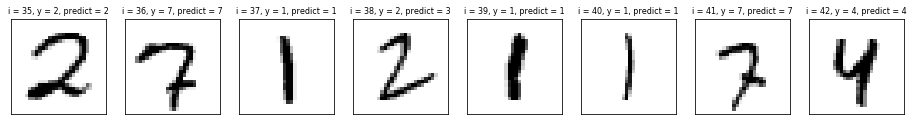

In [16]:
print("The error case is at i = {}".format(error_list.index[0] - 3))
plot_images_labels_prediction(x_test_image, y_test_label, prediction, start_index = max(0, error_list.index[0] - 3))
print()

In [17]:
print("Process ended.", "\n")

Process ended. 

